# These are the Cartography visuals.

# Imports Section 

In [1]:
import sys
sys.path.append("../notebooks/scripts/")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import altair as alt
from altair_saver import save
from augur.utils import json_to_tree
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
#from reportlab.graphics import renderPDF
import seaborn as sns
#from svglib.svglib import svg2rlg

from Helpers import linking_tree_with_plots_clickable, linking_tree_with_plots_brush, scatterplot_with_tooltip_interactive, scatterplot_with_tooltip
from Helpers import get_y_positions

%matplotlib inline

In [5]:
alt.renderers.set_embed_options(
    padding={"left": 0, "right": 0, "bottom": 1, "top": 1}
)

RendererRegistry.enable('default')

In [6]:
sns.set_style("ticks")
# Disable top and right spines.
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
# Display and save figures at higher resolution for presentations and manuscripts.
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['figure.dpi'] = 100
# Display text at sizes large enough for presentations and manuscripts.
mpl.rcParams['font.weight'] = "normal"
mpl.rcParams['axes.labelweight'] = "normal"
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 8
mpl.rc('text', usetex=False)

In [7]:
try: 
    snakemake.input.node_df
    import selenium
    from selenium.webdriver import Chrome 
    from selenium import webdriver

    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument("--remote-debugging-port=9222")

    browser = webdriver.Chrome(options=chrome_options)
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


## Pathogen-specific variables

Consider consolidating these into a single configuration file that can be passed to the notebook as a command line argument for more scriptable generation of these figures.

# Flu Specific Variables

In [8]:
try:
    node_df = snakemake.input.node_df

    pca_df = snakemake.input.pca_df
    explained_variance_pca = snakemake.input.explained_variance_pca

    mds_df = snakemake.input.mds_df

    #Scatterplot:
    scatterplot_pca = snakemake.input.scatterplot_pca
    scatterplot_pca_metadata = snakemake.input.scatterplot_pca_metadata

    scatterplot_mds = snakemake.input.scatterplot_mds
    scatterplot_mds_metadata = snakemake.input.scatterplot_mds_metadata

    scatterplot_tsne = snakemake.input.scatterplot_tsne
    scatterplot_tsne_metadata = snakemake.input.scatterplot_tsne_metadata

    scatterplot_umap = snakemake.input.scatterplot_umap
    scatterplot_umap_metadata = snakemake.input.scatterplot_umap_metadata

    #KDE Density:
    KDE_pca = snakemake.input.KDE_pca
    KDE_pca_metadata = snakemake.input.KDE_pca_metadata

    KDE_mds = snakemake.input.KDE_mds
    KDE_mds_metadata = snakemake.input.KDE_mds_metadata

    KDE_tsne = snakemake.input.KDE_tsne
    KDE_tsne_metadata = snakemake.input.KDE_tsne_metadata

    KDE_umap = snakemake.input.KDE_umap
    KDE_umap_metadata = snakemake.input.KDE_umap_metadata
    
    KDE_genetic = snakemake.input.KDE_genetic
    KDE_genetic_metadata = snakemake.input.KDE_genetic_metadata
except:
    print("not in Snakemake, imports unnecessary")

not in Snakemake, imports unnecessary


In [9]:
clades_to_plot = ['3c', '3c2', '3c2.A', '3c3', '3c3.A', '3c3.B','A1','A1a','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A2', 'A2/re', 'A3', 'A4'] 
domain =  ['3c', '3c2', '3c2.A', '3c3', '3c3.A', '3c3.B','A1','A1a','A1b', 'A1b/131K','A1b/135K', 'A1b/135N', 'A2', 'A2/re', 'A3', 'A4'] 
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36','#dc2f24']

# Reading in all the data from the scripts

In [8]:
import os

os.getcwd()

'/mnt/c/Work/BedfordProjects/cartography/seasonal-flu-nextstrain'

In [9]:
#node_df = pd.read_csv(node_df, sep="\t")
node_df = pd.read_csv("results/table.tsv", sep="\t")

In [10]:
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [11]:
node_df.head()

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0      A/Chungbuk/107/2016  2016.05 -1.90  4.81 -0.65 -0.69   8.56 -22.12   
1  A/MUWRP-Uganda/579/2016  2016.67 -1.53  5.17 -0.78 -0.57  34.39 -21.04   
2       A/Shiraz/1011/2015  2015.89 -1.82  5.07 -0.68 -0.66  29.67 -21.05   
3       A/Shiraz/1019/2016  2016.00 -1.97  5.06 -0.67 -0.71  -0.66 -33.64   
4       A/Shiraz/1020/2016  2016.02 -1.97  5.05 -0.69 -0.71   4.68  34.01   

   tsne_x  tsne_y  umap_x  umap_y clade_membership  pca_label  mds_label  \
0  -10.77    5.34    5.67    6.95              3c3         -1         -1   
1  -10.51    5.14   14.58   17.14              3c3         -1         -1   
2  -10.71    4.23   14.47   17.73            3c3.B         -1         -1   
3  -10.71    4.27   14.31   18.06              3c3         -1         -1   
4  -10.71    4.30   14.30   17.99              3c3         -1         -1   

   umap_label  t-sne_label  y  
0           2            9  1  
1           1            9  2  
2           1            9  3  
3           1            9  4  
4           1            9  5

In [12]:
node_df.head()

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0      A/Chungbuk/107/2016  2016.05 -1.90  4.81 -0.65 -0.69   8.56 -22.12   
1  A/MUWRP-Uganda/579/2016  2016.67 -1.53  5.17 -0.78 -0.57  34.39 -21.04   
2       A/Shiraz/1011/2015  2015.89 -1.82  5.07 -0.68 -0.66  29.67 -21.05   
3       A/Shiraz/1019/2016  2016.00 -1.97  5.06 -0.67 -0.71  -0.66 -33.64   
4       A/Shiraz/1020/2016  2016.02 -1.97  5.05 -0.69 -0.71   4.68  34.01   

   tsne_x  tsne_y  umap_x  umap_y clade_membership  pca_label  mds_label  \
0  -10.77    5.34    5.67    6.95              3c3         -1         -1   
1  -10.51    5.14   14.58   17.14              3c3         -1         -1   
2  -10.71    4.23   14.47   17.73            3c3.B         -1         -1   
3  -10.71    4.27   14.31   18.06              3c3         -1         -1   
4  -10.71    4.30   14.30   17.99              3c3         -1         -1   

   umap_label  t-sne_label  y  
0           2            9  1  
1           1            9  2  
2           1            9  3  
3           1            9  4  
4           1            9  5

In [15]:
# Reannotate clades that we aren't interested in as "other" to simplify color assignment in visualizations.
try:
    node_df["clade_membership_color"] = node_df["clade_membership"].apply(lambda clade: clade if clade in clades_to_plot else "other")
except:
    node_df["clade_membership_color"] = node_df["clade_membership"]
    print("clades_to_plot undefined")

# Running PCA on Scaled and Centered Data
- I treated each nucleotide as a "site", or dimension, and found the probability of having a certain nucleotide given the frequency of that letter at that site.
- I used [this paper][1] as my source 
- The equation is as follows where C is the matrix of dimensions, M is the mean, and p is the frequency of a nucleotide at that given site. 
![](https://journals.plos.org/plosgenetics/article/file?type=thumbnail&id=info:doi/10.1371/journal.pgen.0020190.e003)

In [18]:
#principalDf = pd.read_csv(pca_df, index_col=0)
principalDf = pd.read_csv("results/embed_pca.csv", index_col=0)

In [19]:
#explained_variance_df = pd.read_csv(explained_variance_pca)
explained_variance_df = pd.read_csv("results/explained_variance_pca.csv")
explained_variance_df

explained variance  principal components
0              0.2665                     1
1              0.1869                     2
2              0.0816                     3
3              0.0537                     4
4              0.0289                     5
5              0.0242                     6
6              0.0203                     7
7              0.0171                     8
8              0.0149                     9
9              0.0107                    10

NameError: name 'snakemake' is not defined

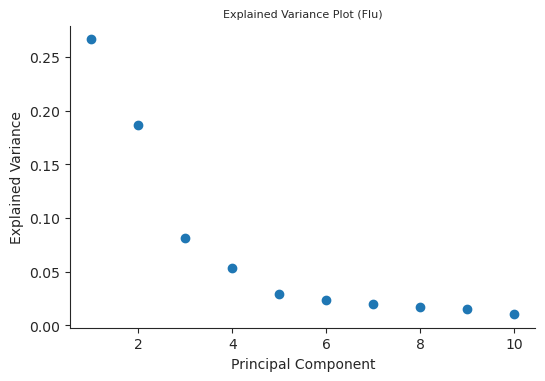

In [20]:
plt.plot(explained_variance_df['principal components'].values.tolist(), explained_variance_df["explained variance"].values.tolist(), 'o')

plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")

plt.title(f"Explained Variance Plot (Flu)")

plt.savefig(snakemake.output.Explained_variance_PCA)

In [21]:
merged_pca_df = principalDf.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [22]:
merged_pca_df.head()

strain      pca1      pca2      pca3      pca4      pca5  \
0      A/Alabama/14/2016 -2.664887  6.973827 -0.301230  1.020696  0.379043   
1        A/Idaho/34/2016 -2.664942  6.971151 -0.300129  1.020175  0.379158   
2  A/Mississippi/17/2016 -2.512849  6.981518 -0.357588  1.032523  0.387054   
3      A/Arizona/65/2016 -2.388924  6.668599 -0.913418 -0.956146  0.070491   
4     A/Missouri/16/2016 -2.386035  6.662387 -0.909896 -0.951137  0.070751   

       pca6      pca7      pca8      pca9     pca10  pca_label     date    y  \
0  0.316782 -0.185718 -0.232170 -0.257529 -0.461033         -1  2016.80  113   
1  0.316992 -0.183550 -0.230414 -0.255611 -0.456360         -1  2016.47  112   
2  0.313910 -0.190216 -0.199819 -0.292666 -0.455177         -1  2016.89  114   
3 -0.433710  0.209178 -0.169632 -0.047842 -0.068203         10  2016.35  108   
4 -0.431873  0.206836 -0.164117 -0.054765 -0.066172         10  2016.52  109   

  clade_membership clade_membership_color  
0            3c3.A                  3c3.A  
1            3c3.A                  3c3.A  
2            3c3.A                  3c3.A  
3            3c3.A                  3c3.A  
4            3c3.A                  3c3.A

In [23]:
explained_variance_PCA = explained_variance_df["explained variance"].values.tolist()

In [24]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "clade_membership:N",['strain', "clade_membership"], domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

# HDBSCAN Output

In [25]:
list_of_chart = linking_tree_with_plots_clickable(merged_pca_df,['pca1','pca2','pca3','pca4', 'pca5', 'pca6'],
                                         ['PCA1 (Explained Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
                                          'PCA2 (Explained Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",
                                          'PCA3 (Explained Variance : {}%'.format(round(explained_variance_PCA[2]*100,2)) + ")",
                                          'PCA4 (Explained Variance : {}%'.format(round(explained_variance_PCA[3]*100,2)) + ")",
                                          'PCA5 (Explained Variance : {}%'.format(round(explained_variance_PCA[4]*100,2)) + ")",
                                          'PCA6 (Explained Variance : {}%'.format(round(explained_variance_PCA[5]*100,2)) + ")"],
                                         "pca_label:N",["pca_label"], ['strain']) #domain, range_)
PCAFluBrush = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[4]

PCAFluBrush
#PCAFluBrush.save("docs/PCA" + virus_name + "Brush.html")

alt.HConcatChart(...)

In [43]:
total_df_PCA = pd.read_csv(scatterplot_pca,index_col=0)
metadata_PCA = pd.read_csv(scatterplot_pca_metadata, index_col=0)

#total_df_PCA = pd.read_csv("results/scatterplot_pca.csv",index_col=0)
#metadata_PCA = pd.read_csv("results/scatterplot_pca_metadata.csv", index_col=0)

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (PCA)")
ax.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

NameError: name 'scatterplot_pca' is not defined

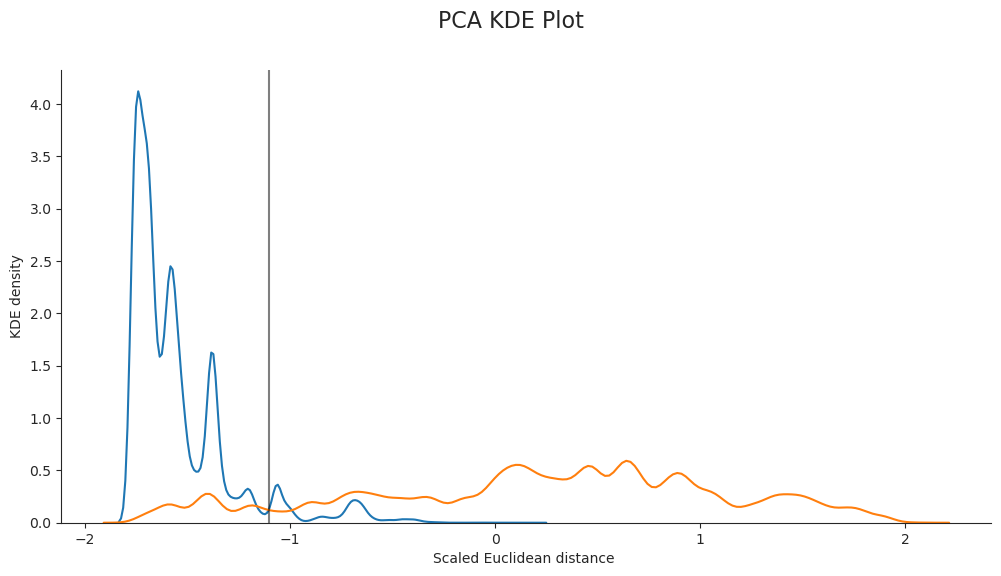

In [63]:
KDE_pca = "results/KDEDensity_pca.csv"
KDE_pca_metadata = "results/KDEDensity_pca_metadata.csv"

PCA_KDE_df = pd.read_csv(KDE_pca)
PCA_KDE_metadata_df = pd.read_csv(KDE_pca_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('PCA KDE Plot', fontsize=16)
sns.despine()

# Running MDS on the Dataset

In [30]:
MDS_df = pd.read_csv(mds_df, index_col=0)
#MDS_df = pd.read_csv("results/embed_mds.csv")

In [31]:
merged_mds_df = MDS_df.merge(node_df[["strain", "date", "y", "clade_membership", "clade_membership_color"]], on="strain")

In [32]:
merged_mds_df

strain       mds1       mds2  mds_label     date     y  \
0           A/Alabama/14/2016  -7.197490  41.067576          1  2016.80   113   
1             A/Idaho/34/2016 -14.623302  36.931771         -1  2016.47   112   
2       A/Mississippi/17/2016  -0.953700  42.344874         -1  2016.89   114   
3           A/Arizona/65/2016 -14.384872  36.271345         -1  2016.35   108   
4          A/Missouri/16/2016 -13.343067  34.211686          0  2016.52   109   
...                       ...        ...        ...        ...      ...   ...   
1913     A/India/1736023/2017 -23.324547 -18.221007         -1  2017.79  1834   
1914     A/HongKong/3391/2017  18.197519 -16.317755          2  2017.52   460   
1915      A/Keelung/0023/2016  17.023027 -14.564335          2  2016.02   463   
1916  A/MUWRP-Uganda/579/2016 -34.471363  21.086996         -1  2016.67     2   
1917     A/India/1732610/2017 -22.363302 -33.343723         -1  2017.68  1694   

     clade_membership clade_membership_color  
0               3c3.A                  3c3.A  
1               3c3.A                  3c3.A  
2               3c3.A                  3c3.A  
3               3c3.A                  3c3.A  
4               3c3.A                  3c3.A  
...               ...                    ...  
1913         A1b/135K               A1b/135K  
1914               A3                     A3  
1915            3c2.A                  3c2.A  
1916              3c3                    3c3  
1917         A1b/135N               A1b/135N  

[1918 rows x 8 columns]

In [33]:
chart_12_mds = scatterplot_with_tooltip_interactive(merged_mds_df,'mds1','mds2',"mds1","mds2",['strain','clade_membership'],'clade_membership_color:N', domain, range_)
chart_12_mds

alt.Chart(...)

In [34]:
list_of_chart = linking_tree_with_plots_brush(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
list_of_chart[0]|list_of_chart[1]

alt.HConcatChart(...)

# HDBSCAN output:

In [35]:
list_of_chart = linking_tree_with_plots_clickable(merged_mds_df,['mds1','mds2'],["MDS1", "MDS2"], 'mds_label:N', ["mds_label"], ['strain','clade_membership'])
list_of_chart[0]|list_of_chart[1]|list_of_chart[2]

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


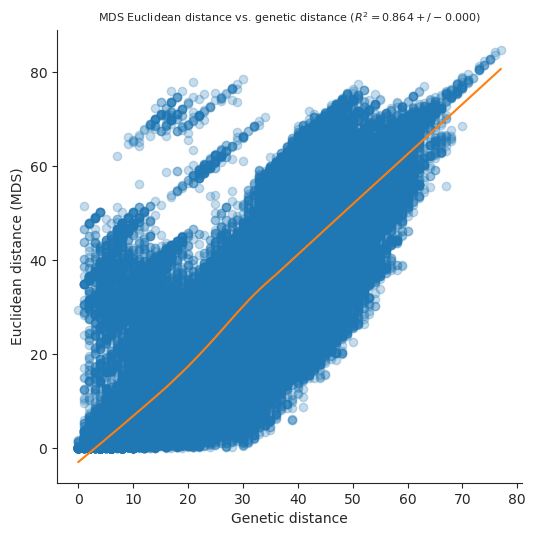

In [36]:
total_df_MDS = pd.read_csv(scatterplot_mds,index_col=0)
metadata_MDS = pd.read_csv(scatterplot_mds_metadata, index_col=0)

#total_df_MDS = pd.read_csv("results/scatterplot_mds.csv",index_col=0)
#metadata_MDS = pd.read_csv("results/scatterplot_mds_metadata.csv", index_col=0)

mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (MDS)")
ax.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

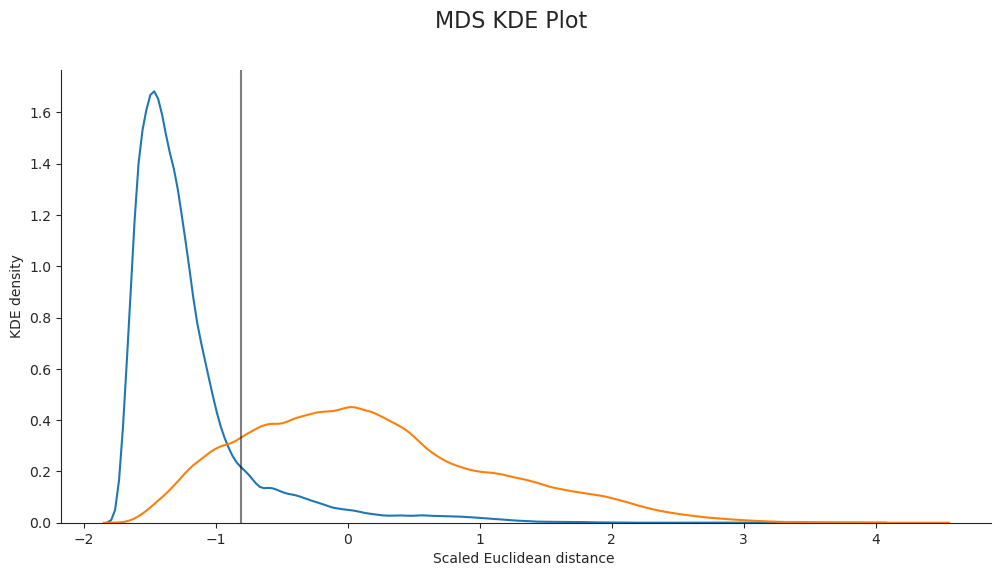

In [64]:
#KDE_mds = "results/KDEDensity_mds.csv"
#KDE_mds_metadata = "results/KDEDensity_mds_metadata.csv"

MDS_KDE_df = pd.read_csv(KDE_mds)
MDS_KDE_metadata_df = pd.read_csv(KDE_mds_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('MDS KDE Plot', fontsize=16)
sns.despine()

# Running T-SNE on the Dataset 

In [37]:
TSNE_df = node_df[["strain", "date", "y", "clade_membership", "tsne_x", "tsne_y", "t-sne_label"]]

In [38]:
scatterplot_with_tooltip_interactive(TSNE_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain', "clade_membership"],'clade_membership:N', domain, range_)

alt.Chart(...)

In [39]:
list_of_chart = linking_tree_with_plots_brush(
    TSNE_df,
    ['tsne_x','tsne_y'],
    ['tsne_x','tsne_y'],
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_tsne = list_of_chart[0]|list_of_chart[1]
chart_tsne

alt.HConcatChart(...)

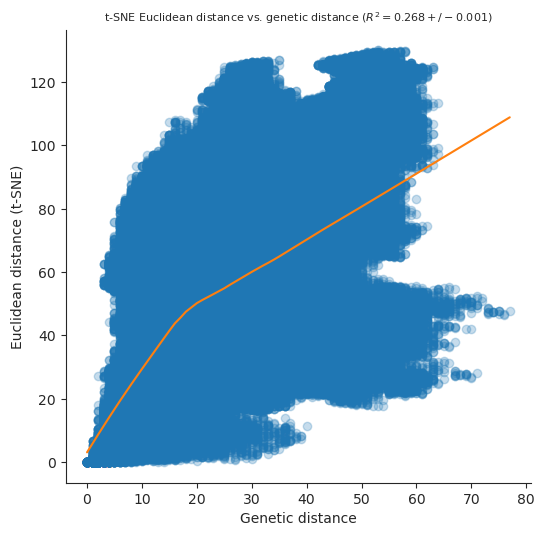

In [42]:
total_df_TSNE = pd.read_csv(scatterplot_tsne,index_col=0)
metadata_TSNE = pd.read_csv(scatterplot_tsne_metadata, index_col=0)

#total_df_TSNE = pd.read_csv("results/scatterplot_t-sne.csv",index_col=0)
#metadata_TSNE = pd.read_csv("results/scatterplot_t-sne_metadata.csv", index_col=0)

mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (t-SNE)")
ax.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

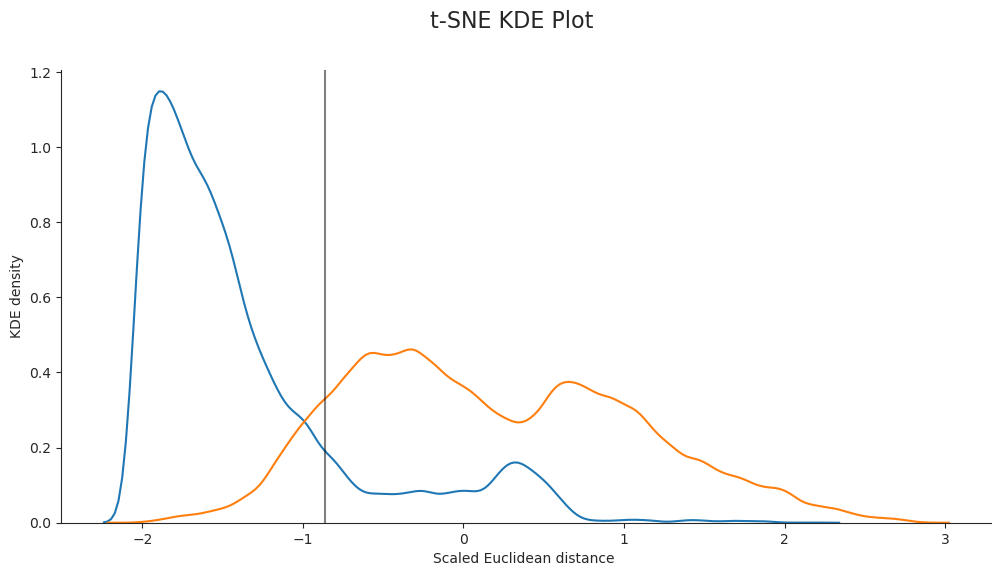

In [65]:
KDE_tsne = "results/KDEDensity_t-sne.csv"
KDE_tsne_metadata = "results/KDEDensity_t-sne_metadata.csv"

TSNE_KDE_df = pd.read_csv(KDE_tsne)
TSNE_KDE_metadata_df = pd.read_csv(KDE_tsne_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('t-SNE KDE Plot', fontsize=16)
sns.despine()

# Running UMAP on the Dataset

In [44]:
UMAP_df = node_df[["strain", "date", "y", "clade_membership", "umap_x", "umap_y"]]

In [45]:
scatterplot_with_tooltip_interactive(UMAP_df,'umap_x','umap_y','umap_x','umap_y',['strain'],'clade_membership:N', domain, range_)

alt.Chart(...)

In [46]:
list_of_data_and_titles = ['umap_x','umap_y']
list_of_chart = linking_tree_with_plots_brush(
    UMAP_df,
    list_of_data_and_titles,
    list_of_data_and_titles,
    'clade_membership:N',
    ["strain:N"],
    domain,
    range_
)
chart_umap = list_of_chart[0]|list_of_chart[1]
chart_umap
#chart.save("../docs/UMAPMERSBrush.html")

alt.HConcatChart(...)

/home/nandsra21/anaconda3/envs/cartography/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


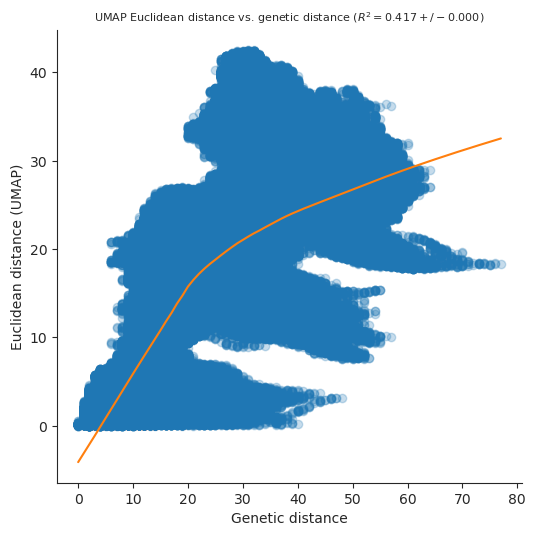

In [48]:
total_df_UMAP = pd.read_csv(scatterplot_umap,index_col=0)
metadata_UMAP = pd.read_csv(scatterplot_umap_metadata, index_col=0)

#total_df_UMAP = pd.read_csv("results/scatterplot_umap.csv",index_col=0)
#metadata_UMAP = pd.read_csv("results/scatterplot_umap_metadata.csv", index_col=0)

mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax.set_xlabel("Genetic distance")
ax.set_ylabel("Euclidean distance (UMAP)")
ax.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")

sns.despine()

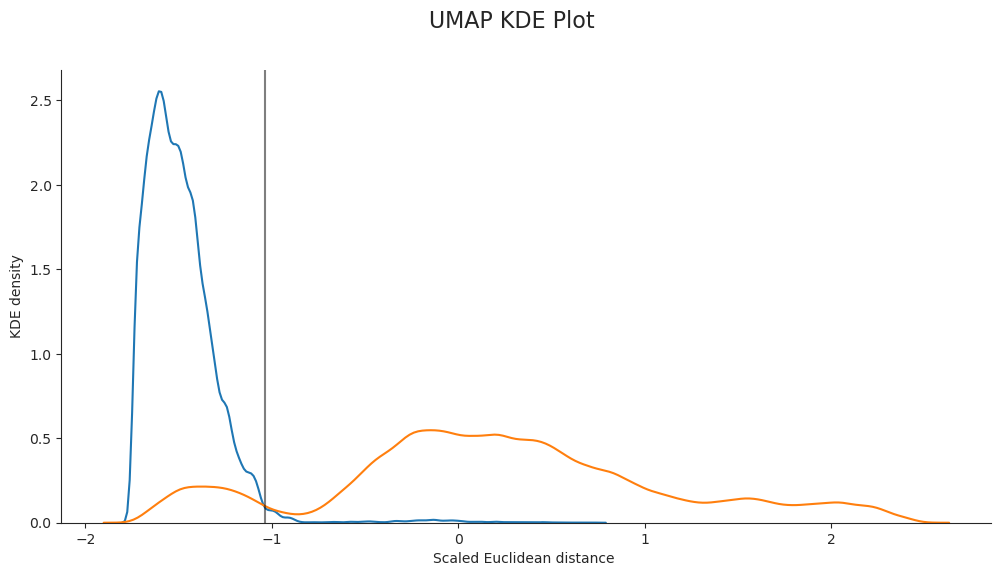

In [66]:
KDE_umap = "results/KDEDensity_umap.csv"
KDE_umap_metadata = "results/KDEDensity_umap_metadata.csv"


UMAP_KDE_df = pd.read_csv(KDE_umap)
UMAP_KDE_metadata_df = pd.read_csv(KDE_umap_metadata)

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax)
ax = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax)

ax.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)

ax.set_xlabel("Scaled Euclidean distance ")
ax.set_ylabel("KDE density")

fig.suptitle('UMAP KDE Plot', fontsize=16)
sns.despine()

# Linking all plots together clickable with Tree

In [25]:
data = linking_tree_with_plots_brush(
    node_df,
    ['mds1', 'mds2','tsne_x','tsne_y', 'pca1', 'pca2', 'umap_x','umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_PCA[0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_PCA[1]*100,2)) + ")",'UMAP1','UMAP2'],
    'clade_membership:N',
    ['strain'],
    domain,
    range_
)

In [26]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.vconcat(data[0],embeddings)
fullChart
#fullChart.save("../docs/FullLinkedChartBrushableFlu.html")
fullChart.save(snakemake.output.fullChart)
save(fullChart, snakemake.output.fullChartPNG, scale_factor=2.0)

alt.VConcatChart(...)

## Scatterplots for all embeddings 
Concatenating all embedding data frames to plot genetic vs Euclidean distance for each embedding

In [49]:
import matplotlib.gridspec as gridspec

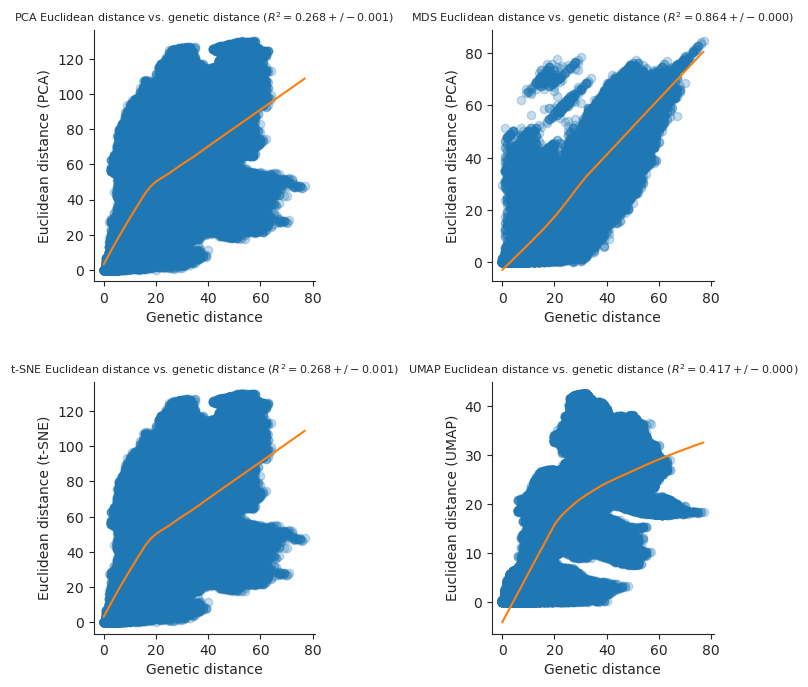

In [51]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.tight_layout(pad=8.0)
gs = gridspec.GridSpec(2, 2, figure=fig, hspace=0.4, wspace=0.8)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

mean = metadata_PCA["mean"].values.tolist()[0]
std = metadata_PCA["std"].values.tolist()[0]

ax1.plot(total_df_PCA["genetic"], total_df_PCA["euclidean"], "o", alpha=0.25)
ax1.plot(total_df_PCA["LOWESS_x"], total_df_PCA["LOWESS_y"], label="LOESS")

ax1.set_xlabel("Genetic distance")
ax1.set_ylabel("Euclidean distance (PCA)")
ax1.set_title(f"PCA ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_MDS["mean"].values.tolist()[0]
std = metadata_MDS["std"].values.tolist()[0]

ax2.plot(total_df_MDS["genetic"], total_df_MDS["euclidean"], "o", alpha=0.25)
ax2.plot(total_df_MDS["LOWESS_x"], total_df_MDS["LOWESS_y"], label="LOESS")

ax2.set_xlabel("Genetic distance")
ax2.set_ylabel("Euclidean distance (PCA)")
ax2.set_title(f"MDS ($R^2={mean:.3f} +/- {std:.3f}$)")


mean = metadata_TSNE["mean"].values.tolist()[0]
std = metadata_TSNE["std"].values.tolist()[0]

ax3.plot(total_df_TSNE["genetic"], total_df_TSNE["euclidean"], "o", alpha=0.25)
ax3.plot(total_df_TSNE["LOWESS_x"], total_df_TSNE["LOWESS_y"], label="LOESS")

ax3.set_xlabel("Genetic distance")
ax3.set_ylabel("Euclidean distance (t-SNE)")
ax3.set_title(f"t-SNE ($R^2={mean:.3f} +/- {std:.3f}$)")



mean = metadata_UMAP["mean"].values.tolist()[0]
std = metadata_UMAP["std"].values.tolist()[0]

ax4.plot(total_df_UMAP["genetic"], total_df_UMAP["euclidean"], "o", alpha=0.25)
ax4.plot(total_df_UMAP["LOWESS_x"], total_df_UMAP["LOWESS_y"], label="LOESS")

ax4.set_xlabel("Genetic distance")
ax4.set_ylabel("Euclidean distance (UMAP)")
ax4.set_title(f"UMAP ($R^2={mean:.3f} +/- {std:.3f}$)")


sns.despine()
plt.savefig(snakemake.output.Scatterplot, dpi=300)

## Within- and between-clade Euclidean distances for all embeddings

Use the complete embedding data frame to calculate pairwise Euclidean distances between samples and plot the results in a single figure.

In [67]:
KDE_genetic = "results/KDEDensity_genetic.csv"
KDE_genetic_metadata = "results/KDEDensity_genetic_metadata.csv"

Genetic_KDE_df = pd.read_csv(KDE_genetic)
Genetic_KDE_metadata_df = pd.read_csv(KDE_genetic_metadata)

In [68]:
import matplotlib.gridspec as gridspec

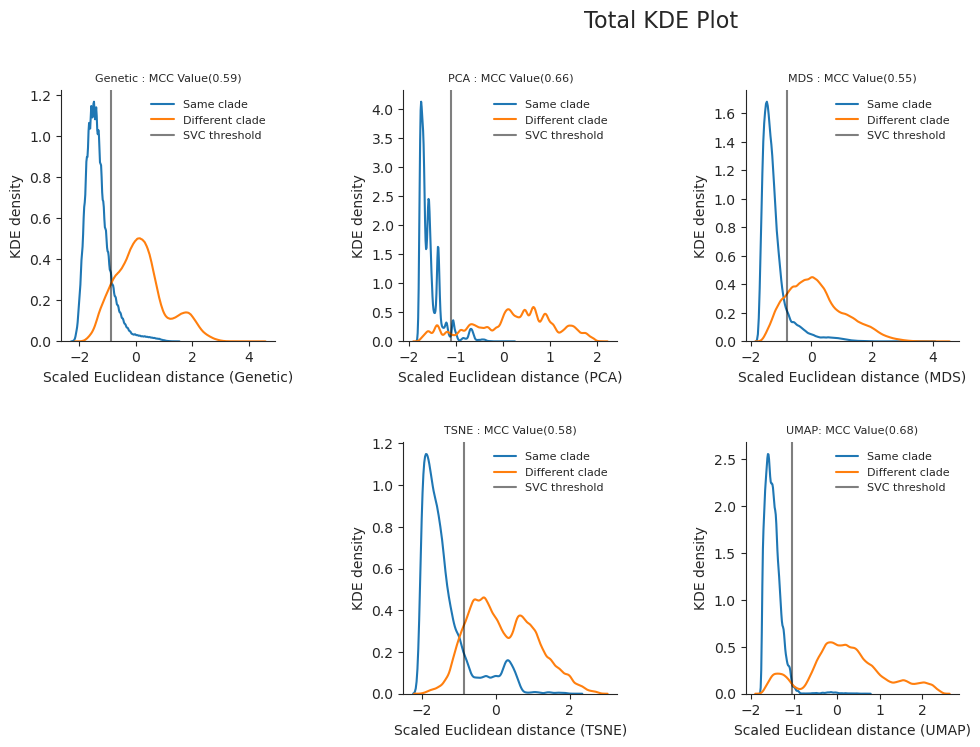

In [70]:
#fig, axes = plt.subplots(1, 5, figsize=(40, 8))
fig = plt.figure(figsize=(16, 8), constrained_layout=False)
gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.4, wspace=0.6)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])



#GENETIC 
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax1)
ax1 = sns.kdeplot(Genetic_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax1)
ax1.axvline(x=Genetic_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax1.legend(frameon=False)
ax1.set_title('Genetic : MCC Value(' + str(round(Genetic_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax1.set_xlabel("Scaled Euclidean distance (Genetic)")
ax1.set_ylabel("KDE density")

#PCA
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax2)
ax2 = sns.kdeplot(PCA_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax2)
ax2.axvline(x=PCA_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax2.legend(frameon=False)
ax2.set_title('PCA : MCC Value(' + str(round(PCA_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax2.set_xlabel("Scaled Euclidean distance (PCA)")
ax2.set_ylabel("KDE density")

#MDS
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax3)
ax3 = sns.kdeplot(MDS_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax3)
ax3.axvline(x=MDS_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax3.legend(frameon=False)
ax3.set_title('MDS : MCC Value(' + str(round(MDS_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax3.set_xlabel("Scaled Euclidean distance (MDS)")
ax3.set_ylabel("KDE density")

#TSNE
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax4)
ax4 = sns.kdeplot(TSNE_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax4)
ax4.axvline(x=TSNE_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax4.legend(frameon=False)
ax4.set_title('TSNE : MCC Value(' + str(round(TSNE_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax4.set_xlabel("Scaled Euclidean distance (TSNE)")
ax4.set_ylabel("KDE density")

#UMAP
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 1")["scaled_distance"], label="Same clade", ax=ax5)
ax5 = sns.kdeplot(UMAP_KDE_df.query("clade_status == 0")["scaled_distance"], label="Different clade", ax=ax5)
ax5.axvline(x=UMAP_KDE_metadata_df["threshold"].values.tolist()[0], label="SVC threshold", color="#000000", alpha=0.5)
ax5.legend(frameon=False)
ax5.set_title('UMAP: MCC Value(' + str(round(UMAP_KDE_metadata_df["MCC"].values.tolist()[0],2))+ ')')
ax5.set_xlabel("Scaled Euclidean distance (UMAP)")
ax5.set_ylabel("KDE density")

sns.despine()
plt.savefig(snakemake.output.KDE_density, dpi=600, bbox_inches='tight')

# Supplemental Figures

In [46]:
list_of_chart = linking_tree_with_plots_brush(merged_pca_df,['pca' + str(i) for i in range(1,11)],['PCA' + str(i) for i in range(1,11)], 'clade_membership:N', ['strain','clade_membership'], domain, range_)
chart = list_of_chart[0]|list_of_chart[1]|list_of_chart[2]|list_of_chart[3]

chart.save(snakemake.output.PCA_Supplement)
save(chart, snakemake.output.PCA_Supplement_PNG)

# Default vs non default

In [3]:
node_df = pd.read_csv("results/table.tsv", sep="\t")
node_df.rename(columns={'num_date':'date', 'y_value':"y"}, inplace=True)

In [4]:
node_df

strain     date  pca1  pca2  pca3  pca4   mds1   mds2  \
0          A/Chungbuk/107/2016  2016.05 -1.86  4.90 -0.64 -0.68 -23.42   4.77   
1      A/MUWRP-Uganda/579/2016  2016.67 -1.48  5.25 -0.76 -0.56 -39.44  -6.38   
2           A/Shiraz/1011/2015  2015.89 -1.77  5.16 -0.68 -0.65   2.16 -37.86   
3           A/Shiraz/1019/2016  2016.00 -1.92  5.15 -0.65 -0.72 -28.89  18.07   
4           A/Shiraz/1020/2016  2016.02 -1.92  5.15 -0.67 -0.71 -28.69  16.11   
...                        ...      ...   ...   ...   ...   ...    ...    ...   
1913    A/NewHampshire/22/2017  2017.74 -2.92 -1.30 -2.55  1.69  12.01  15.12   
1914       A/Incheon/1320/2018  2018.19 -2.92 -1.31 -2.55  1.69  12.87  16.19   
1915        A/Maryland/53/2017  2017.74 -2.92 -1.30 -2.54  1.69  11.12  14.07   
1916  A/Guangdong/SKLRD01/2017  2017.54 -2.92 -1.30 -2.55  1.69  10.39  13.08   
1917       A/Michigan/276/2017  2017.61 -2.92 -1.30 -2.55  1.69  10.39  13.08   

      tsne_x  tsne_y  ...  clade_membership  pca_label mds_label  umap_label  \
0     -44.32  -32.31  ...               3c3          7        -1          11   
1     -43.92  -32.09  ...               3c3          7         2          13   
2     -44.94  -31.50  ...             3c3.B          7         0          13   
3     -44.88  -31.49  ...               3c3          7        -1          13   
4     -44.86  -31.51  ...               3c3          7        -1          13   
...      ...     ...  ...               ...        ...       ...         ...   
1913   36.55  -15.87  ...          A1b/135N          3         9           7   
1914   34.80  -16.08  ...          A1b/135N          3         9           7   
1915   34.95  -15.51  ...          A1b/135N          3         9           7   
1916   35.64  -15.35  ...          A1b/135N          3         9           7   
1917   35.64  -15.35  ...          A1b/135N          3         9           7   

      t-sne_label  pca_label_default  mds_label_default  umap_label_default  \
0              18                 -1                 -1                  18   
1              18                 -1                  2                  21   
2              18                 -1                  0                  21   
3              18                 -1                 -1                  21   
4              18                 -1                 -1                  21   
...           ...                ...                ...                 ...   
1913            5                 23                 -1                  14   
1914            5                 -1                 -1                  14   
1915            5                 -1                 17                  13   
1916            5                 23                 23                  13   
1917            5                 23                 23                  13   

      t-sne_label_default     y  
0                      -1     1  
1                      33     2  
2                      -1     3  
3                      -1     4  
4                      -1     5  
...                   ...   ...  
1913                    3  1914  
1914                    3  1915  
1915                    3  1916  
1916                    3  1917  
1917                    3  1918  

[1918 rows x 22 columns]

In [5]:
TSNE_df = pd.read_csv("results/embed_t-sne_sequences.csv",index_col=0)

merged_tsne_df = TSNE_df.merge(node_df[["strain", "date", "y", "clade_membership"]], on="strain")

In [7]:
range_ = ['#6626d4', '#4138c3', '#4e70ff', '#5499ff', '#61b8f0', '#5499ff', '#87dfb3','#a0e994', '#bdee78', '#ddee64', '#f8e957', '#ffdb4e', '#ffc348', '#ff9e40', '#ff6e36','#dc2f24']

In [46]:
import numpy as np
import colorsys
import re

def _get_colors(num_colors):
    colors=[]
    for i in np.arange(0., 360., 360. / num_colors):
        hue = i/360.
        lightness = (50 + np.random.rand() * 10)/100.
        saturation = (90 + np.random.rand() * 10)/100.
        colors.append(colorsys.hls_to_rgb(hue, lightness, saturation))
    return colors

In [73]:
domain =  merged_tsne_df["t-sne_label"].drop_duplicates().values
range_ = _get_colors(len(domain))
range_ = ["#" + "".join("%02X" % round(i*255) for i in rgb) for rgb in range_]
chart_12_tsne = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'t-sne_label:N', domain, range_).properties(title="t-sne, optimal distance threshold")
domain = merged_tsne_df["t-sne_label_default"].drop_duplicates().values
range_ = _get_colors(len(domain))
range_ = ["#" + "".join("%02X" % round(i*255) for i in rgb) for rgb in range_]
chart_12_default = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'t-sne_label_default:N', domain, range_).properties(title="t-sne, default distance threshold")
domain = merged_tsne_df["clade_membership"].drop_duplicates().values
range_ = _get_colors(len(domain))
range_ = ["#" + "".join("%02X" % round(i*255) for i in rgb) for rgb in range_]
chart_12_clade = scatterplot_with_tooltip_interactive(merged_tsne_df,'tsne_x','tsne_y','tsne_x','tsne_y',['strain','clade_membership', 't-sne_label'],'clade_membership:N', domain, range_).properties(title="t-sne, clade membership")
chart_12_tsne|chart_12_default|chart_12_clade

alt.HConcatChart(...)

In [74]:
PCA_df = pd.read_csv("results/embed_pca_sequences.csv",index_col=0)
MDS_df = pd.read_csv("results/embed_mds_sequences.csv",index_col=0)
TSNE_df = pd.read_csv("results/embed_t-sne_sequences.csv",index_col=0)
UMAP_df = pd.read_csv("results/embed_umap_sequences.csv",index_col=0)
explained_variance_df = pd.read_csv("results/explained_variance_pca_sequences.csv")

In [75]:
merged_df = node_df[["strain", "date", "clade_membership", "y"]].merge(
    PCA_df,
    on="strain"
).merge(
    MDS_df,
    on="strain"
).merge(
    TSNE_df,
    on="strain"
).merge(
    UMAP_df,
    on="strain"
)

In [76]:
merged_df

strain     date clade_membership     y      pca1  \
0          A/Chungbuk/107/2016  2016.05              3c3     1 -1.984890   
1      A/MUWRP-Uganda/579/2016  2016.67              3c3     2 -1.618530   
2           A/Shiraz/1011/2015  2015.89            3c3.B     3 -1.905095   
3           A/Shiraz/1019/2016  2016.00              3c3     4 -2.047364   
4           A/Shiraz/1020/2016  2016.02              3c3     5 -2.047908   
...                        ...      ...              ...   ...       ...   
1913    A/NewHampshire/22/2017  2017.74         A1b/135N  1914 -2.863962   
1914       A/Incheon/1320/2018  2018.19         A1b/135N  1915 -2.866426   
1915        A/Maryland/53/2017  2017.74         A1b/135N  1916 -2.863970   
1916  A/Guangdong/SKLRD01/2017  2017.54         A1b/135N  1917 -2.863439   
1917       A/Michigan/276/2017  2017.61         A1b/135N  1918 -2.863439   

          pca2      pca3      pca4      pca5      pca6  ...  mds_label  \
0     4.813884 -0.588498 -0.643716  0.662713 -0.343309  ...         -1   
1     5.182486 -0.702329 -0.519777  0.664742  0.062948  ...         -1   
2     5.081251 -0.627505 -0.607746  0.590082 -0.416391  ...         -1   
3     5.065411 -0.600725 -0.677830  0.610470 -0.372016  ...         -1   
4     5.061328 -0.618528 -0.665583  0.583674 -0.333632  ...         -1   
...        ...       ...       ...       ...       ...  ...        ...   
1913 -1.400951 -2.550067  1.731207  0.621002 -0.283570  ...          8   
1914 -1.405777 -2.551293  1.725135  0.604639 -0.284293  ...          8   
1915 -1.401021 -2.548178  1.723754  0.639128 -0.265229  ...          8   
1916 -1.400668 -2.549494  1.728846  0.621556 -0.284054  ...          8   
1917 -1.400668 -2.549494  1.728846  0.621556 -0.284054  ...          8   

      mds_label_default     tsne_x     tsne_y  t-sne_label  \
0                    -1   5.860470  -5.424174           10   
1                    -1   5.703531  -5.603368           10   
2                    -1   4.935606  -6.155069           10   
3                    -1   4.954729  -6.142707           10   
4                    -1   4.978380  -6.125903           10   
...                 ...        ...        ...          ...   
1913                  7 -10.445413 -29.280268            8   
1914                  7 -10.152945 -28.867220            8   
1915                  7 -10.466899 -29.588625            8   
1916                  7 -10.483228 -29.578243            8   
1917                  7 -10.483964 -29.578620            8   

      t-sne_label_default    umap_x     umap_y  umap_label  umap_label_default  
0                      10 -1.561299   3.420678           4                   3  
1                      10 -2.926380  -5.847309           3                   2  
2                      10 -3.504496  -6.390293           3                   2  
3                      10 -3.674842  -6.426129           3                   2  
4                      10 -3.652354  -6.703894           3                   2  
...                   ...       ...        ...         ...                 ...  
1913                    9 -5.948899  18.178020           1                   0  
1914                    9 -5.233888  18.857468           1                   0  
1915                    9 -6.295841  17.573109           1                   0  
1916                    9 -6.936928  17.467192           1                   0  
1917                    9 -6.880229  17.502338           1                   0  

[1918 rows x 28 columns]

In [77]:
domain =  merged_df["t-sne_label"].drop_duplicates().values
range_ = _get_colors(len(domain))
range_ = ["#" + "".join("%02X" % round(i*255) for i in rgb) for rgb in range_]

In [78]:
data = linking_tree_with_plots_brush(
    merged_df,
    ['mds1', 'mds2','tsne_x', 'tsne_y', 'pca1', 'pca2', 'umap_x', 'umap_y'],
    ['MDS1', 'MDS2', 'TSNE1', 'TSNE2','PCA1 (Expected Variance : {}%'.format(round(explained_variance_df["explained variance"][0]*100,2)) + ")",
    'PCA2 (Expected Variance : {}%'.format(round(explained_variance_df["explained variance"][1]*100,2)) + ")",'UMAP1','UMAP2'],
    't-sne_label:N',
    ['strain','clade_membership'],
    domain,
    range_
)

In [79]:
PCAMDS = data[3]|data[1]
TSNEUMAP = data[2]|data[4]
embeddings = alt.vconcat(PCAMDS,TSNEUMAP)
embeddings
fullChart = alt.hconcat(data[0],embeddings)

In [80]:
fullChart

alt.HConcatChart(...)